In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from matplotlib import colors
from sklearn.decomposition import PCA

In [2]:
passenger_df=pd.read_csv(r"C:\Users\BAPS\Desktop\Python\Datasets\passenger_sattisfaction.csv")

In [3]:
passenger_df        

#      id  Gender      Customer Type  Age   Type of Travel  \
0            0   70172    Male     Loyal Customer   13  Personal Travel   
1            1    5047    Male  disloyal Customer   25  Business travel   
2            2  110028  Female     Loyal Customer   26  Business travel   
3            3   24026  Female     Loyal Customer   25  Business travel   
4            4  119299    Male     Loyal Customer   61  Business travel   
...        ...     ...     ...                ...  ...              ...   
103899  103899   94171  Female  disloyal Customer   23  Business travel   
103900  103900   73097    Male     Loyal Customer   49  Business travel   
103901  103901   68825    Male  disloyal Customer   30  Business travel   
103902  103902   54173  Female  disloyal Customer   22  Business travel   
103903  103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         ...   
103899                 3            2         

In [4]:
passenger_df_o=passenger_df

In [5]:
passenger_df.info()
# OBSERVATION -> Columns ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'] are object type 
#             -> Columns ['#', 'id', 'Age', 'Flight Distance', 'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes'] are int64 type
#             -> Column ['Arrival Delay in Minutes'] is float64 type

# There are 103904 records and 25 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   #                                  103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
total_missing = passenger_df.isnull().sum()
percentage_missing = total_missing * 100 / len(passenger_df)
missing_value_df = pd.DataFrame(data=[total_missing, percentage_missing], index=["Total", "%"]).T
missing_value_df

# There are some missing values in Column [Arrival Delay in Minuter] but it is very less and we can handle missing values 

Total         %
#                                    0.0  0.000000
id                                   0.0  0.000000
Gender                               0.0  0.000000
Customer Type                        0.0  0.000000
Age                                  0.0  0.000000
Type of Travel                       0.0  0.000000
Class                                0.0  0.000000
Flight Distance                      0.0  0.000000
Inflight wifi service                0.0  0.000000
Departure/Arrival time convenient    0.0  0.000000
Ease of Online booking               0.0  0.000000
Gate location                        0.0  0.000000
Food and drink                       0.0  0.000000
Online boarding                      0.0  0.000000
Seat comfort                         0.0  0.000000
Inflight entertainment               0.0  0.000000
On-board service                     0.0  0.000000
Leg room service                     0.0  0.000000
Baggage handling                     0.0  0.000000
Checkin service                      0.0  0.000000
Inflight service                     0.0  0.000000
Cleanliness                          0.0  0.000000
Departure Delay in Minutes           0.0  0.000000
Arrival Delay in Minutes           310.0  0.298352
satisfaction                         0.0  0.000000

In [7]:
passenger_df.drop(["#"],axis=1,inplace=True)
#Dropping "Satisfaction" column because we have clustering problem and target can't be present in clustering problems and "#" because it representing the index .

In [8]:
passenger_df.drop(["id"],axis=1,inplace=True)

In [9]:
passenger_df.describe().T

count         mean         std   min  \
Age                                103904.0    39.379706   15.114964   7.0   
Flight Distance                    103904.0  1189.448375  997.147281  31.0   
Inflight wifi service              103904.0     2.729683    1.327829   0.0   
Departure/Arrival time convenient  103904.0     3.060296    1.525075   0.0   
Ease of Online booking             103904.0     2.756901    1.398929   0.0   
Gate location                      103904.0     2.976883    1.277621   0.0   
Food and drink                     103904.0     3.202129    1.329533   0.0   
Online boarding                    103904.0     3.250375    1.349509   0.0   
Seat comfort                       103904.0     3.439396    1.319088   0.0   
Inflight entertainment             103904.0     3.358158    1.332991   0.0   
On-board service                   103904.0     3.382363    1.288354   0.0   
Leg room service                   103904.0     3.351055    1.315605   0.0   
Baggage handling                   103904.0     3.631833    1.180903   1.0   
Checkin service                    103904.0     3.304290    1.265396   0.0   
Inflight service                   103904.0     3.640428    1.175663   0.0   
Cleanliness                        103904.0     3.286351    1.312273   0.0   
Departure Delay in Minutes         103904.0    14.815618   38.230901   0.0   
Arrival Delay in Minutes           103594.0    15.178678   38.698682   0.0   

                                     25%    50%     75%     max  
Age                                 27.0   40.0    51.0    85.0  
Flight Distance                    414.0  843.0  1743.0  4983.0  
Inflight wifi service                2.0    3.0     4.0     5.0  
Departure/Arrival time convenient    2.0    3.0     4.0     5.0  
Ease of Online booking               2.0    3.0     4.0     5.0  
Gate location                        2.0    3.0     4.0     5.0  
Food and drink                       2.0    3.0     4.0     5.0  
Online boarding                      2.0    3.0     4.0     5.0  
Seat comfort                         2.0    4.0     5.0     5.0  
Inflight entertainment               2.0    4.0     4.0     5.0  
On-board service                     2.0    4.0     4.0     5.0  
Leg room service                     2.0    4.0     4.0     5.0  
Baggage handling                     3.0    4.0     5.0     5.0  
Checkin service                      3.0    3.0     4.0     5.0  
Inflight service                     3.0    4.0     5.0     5.0  
Cleanliness                          2.0    3.0     4.0     5.0  
Departure Delay in Minutes           0.0    0.0    12.0  1592.0  
Arrival Delay in Minutes             0.0    0.0    13.0  1584.0

In [10]:
passenger_df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 23 columns]

## Univariante Anaysis

C:\Users\BAPS\AppData\Local\Temp\ipykernel_8404\252019640.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


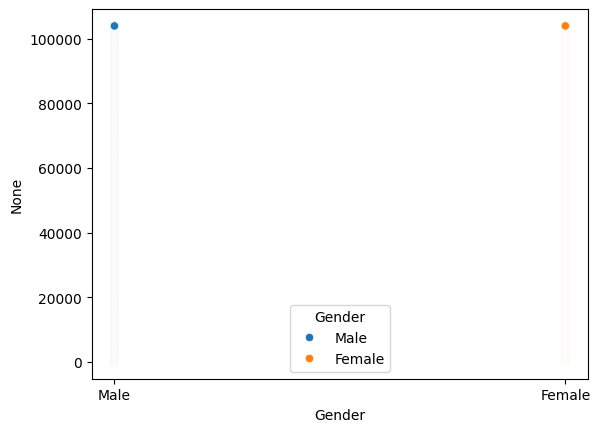

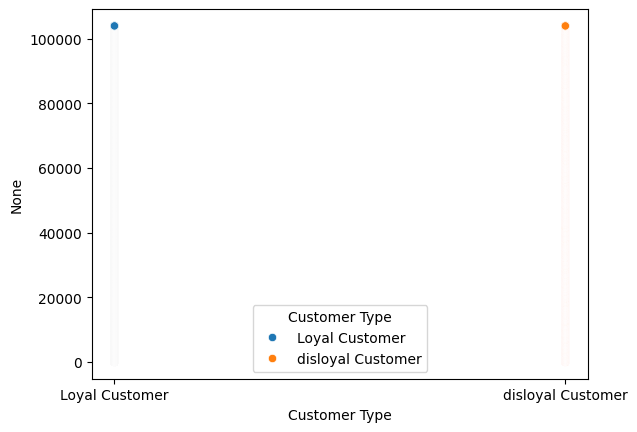

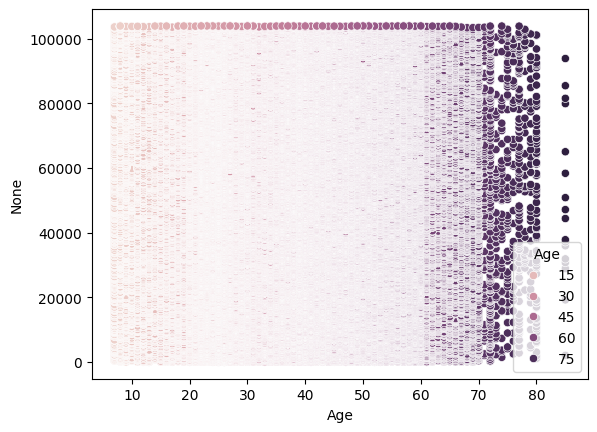

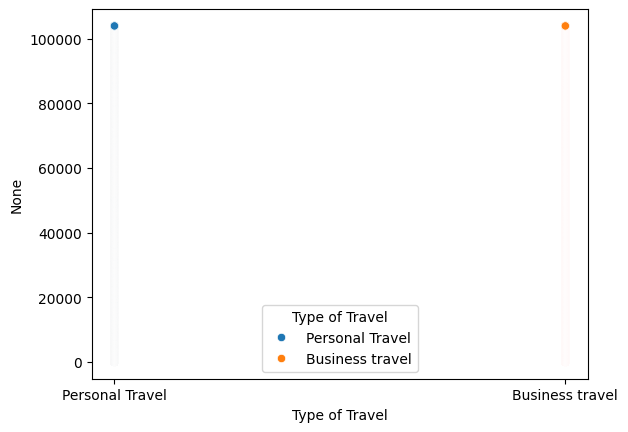

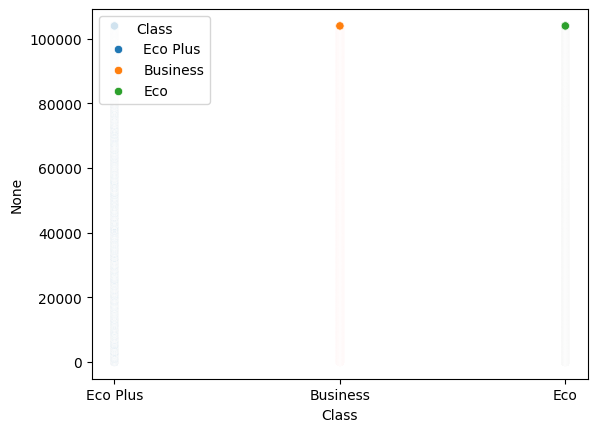

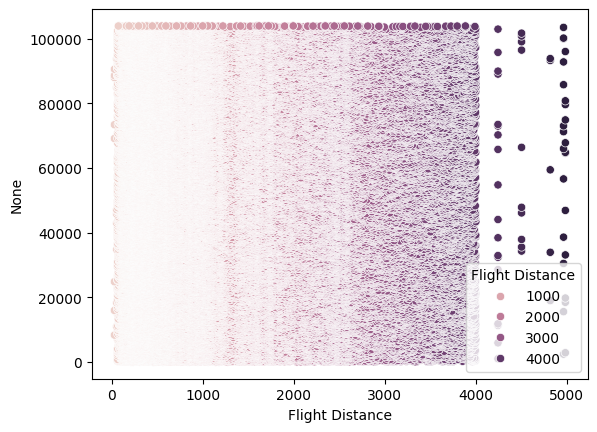

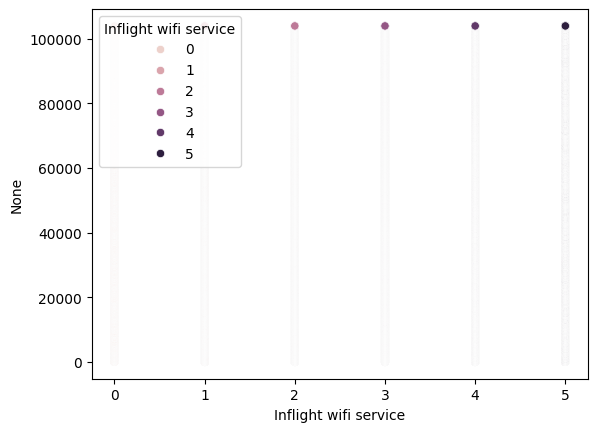

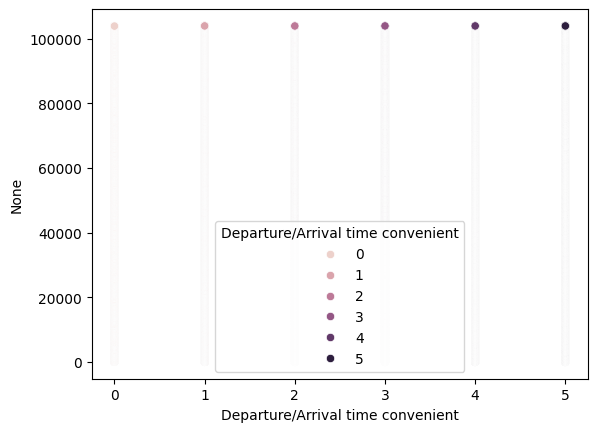

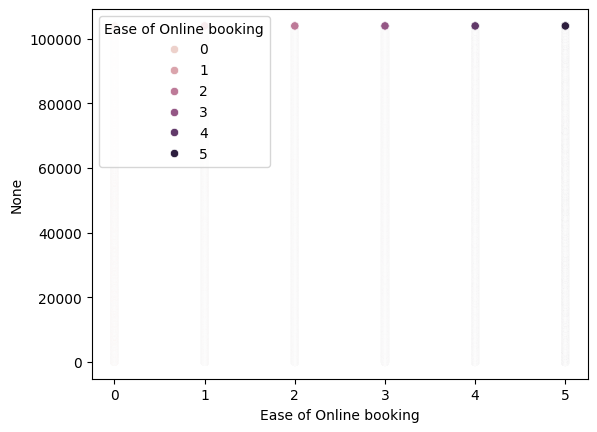

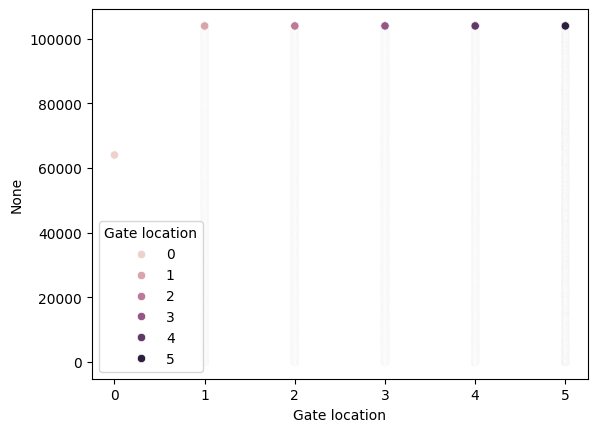

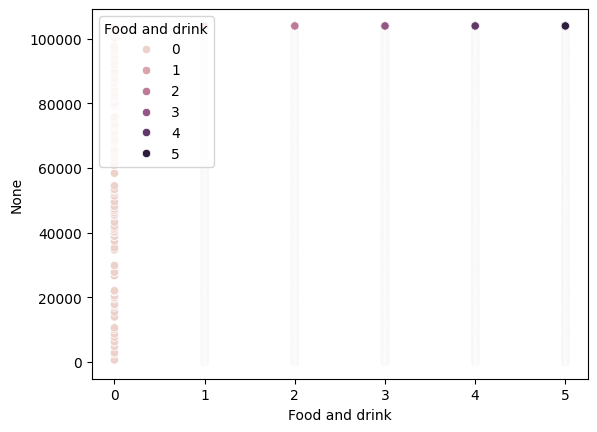

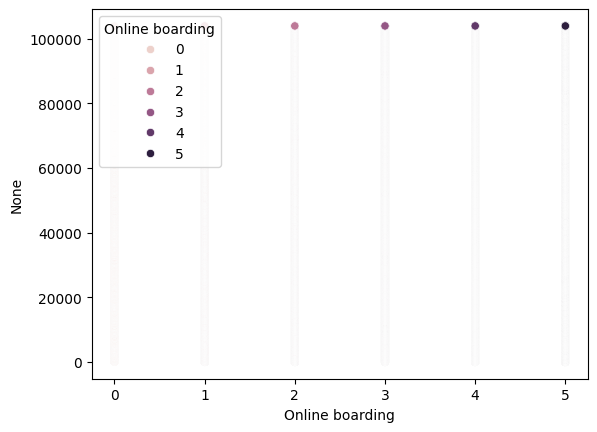

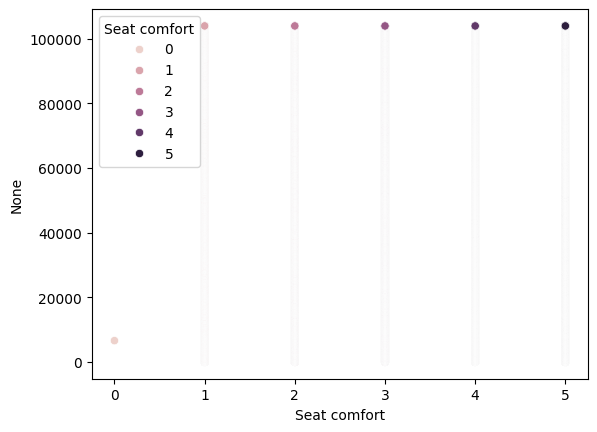

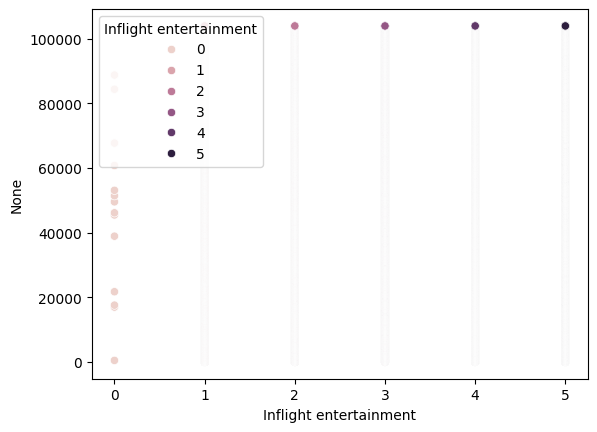

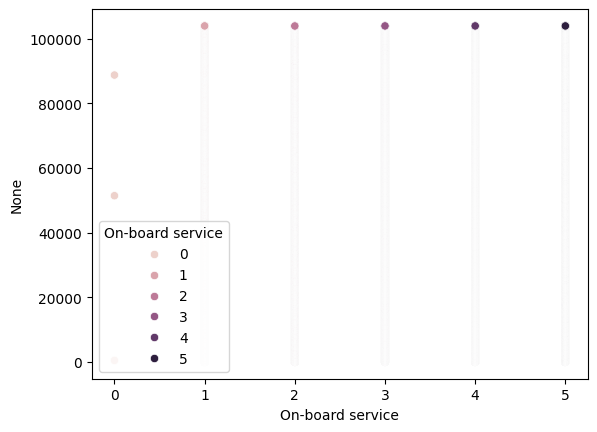

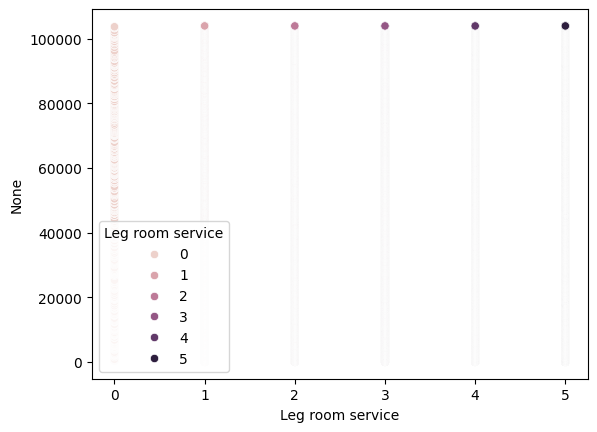

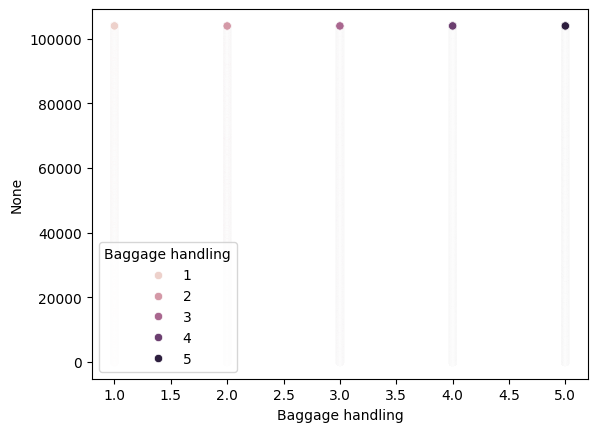

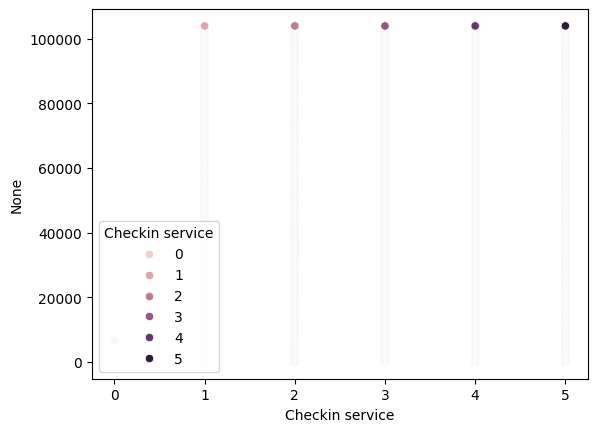

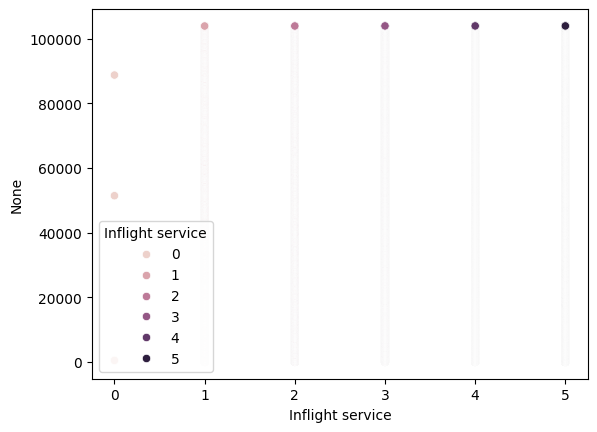

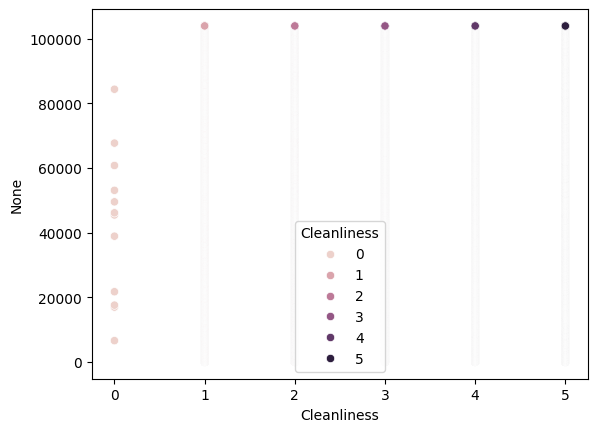

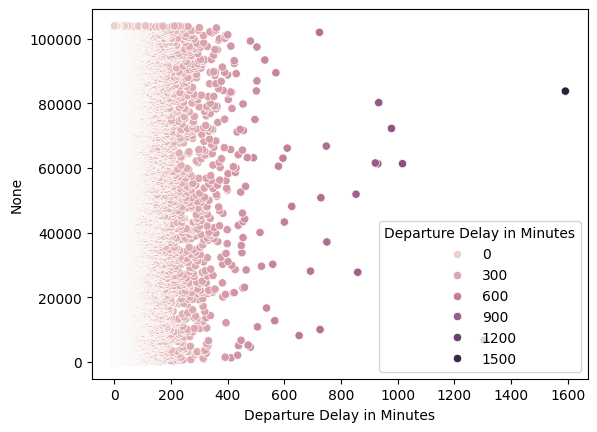

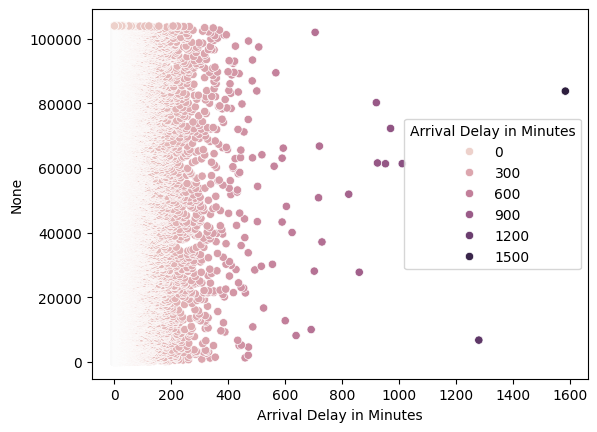

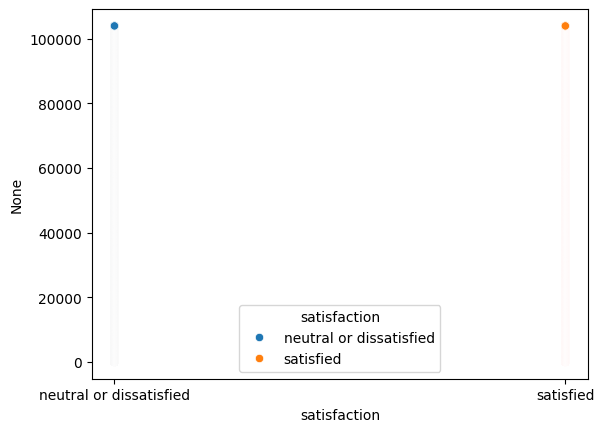

In [11]:
for col in passenger_df.columns:
    plt.figure()
    sns.scatterplot(x=passenger_df[col],data=passenger_df,y=passenger_df.index,hue=col)

c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


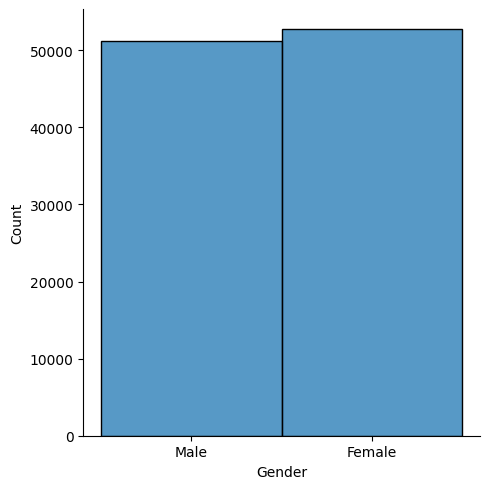

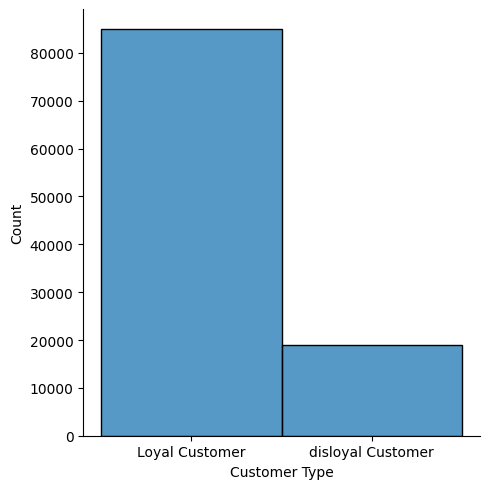

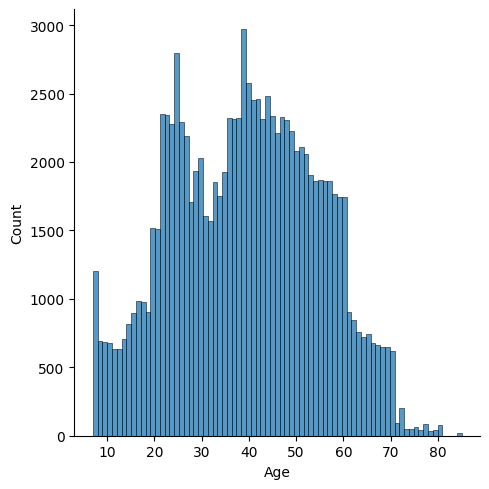

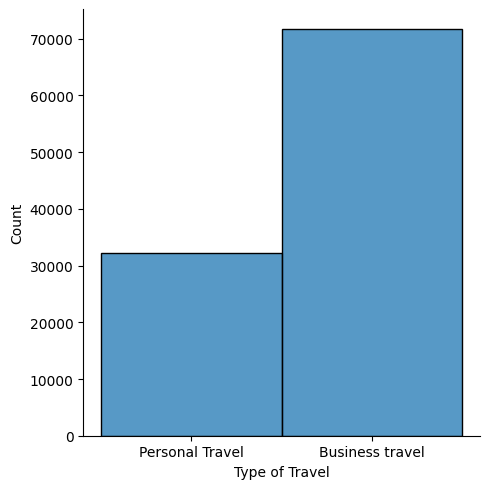

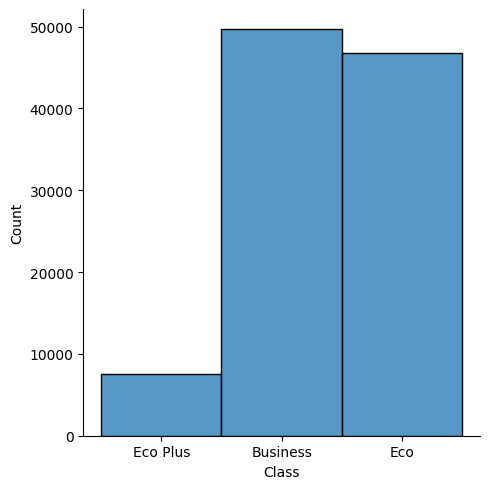

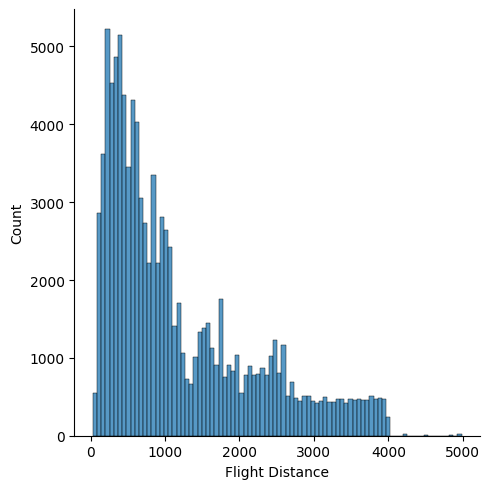

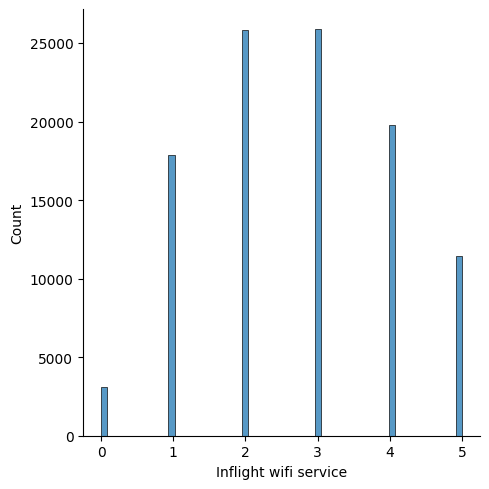

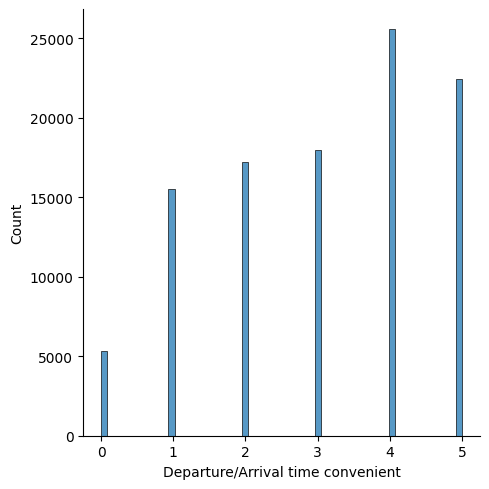

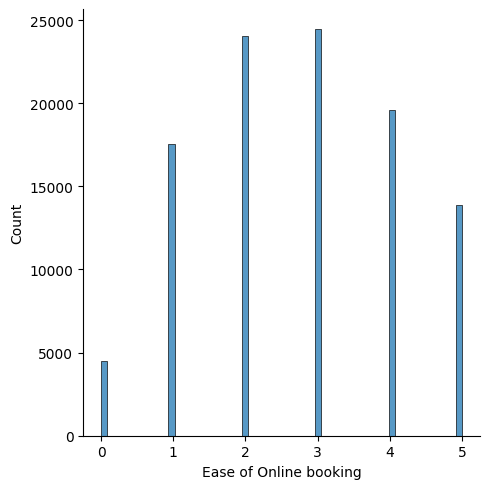

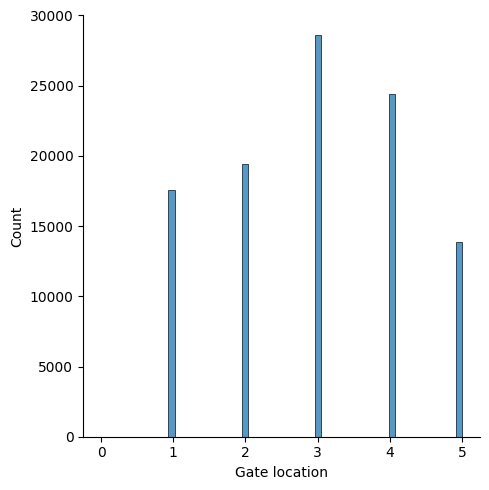

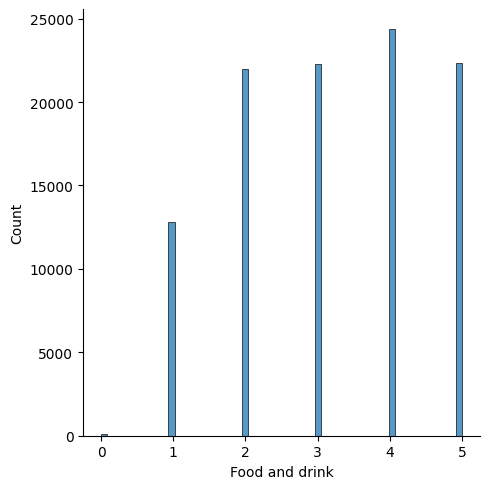

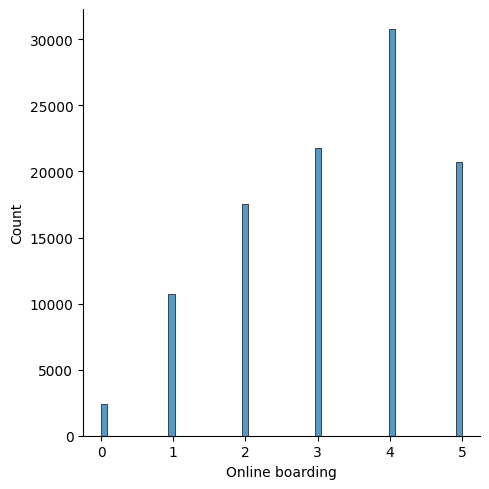

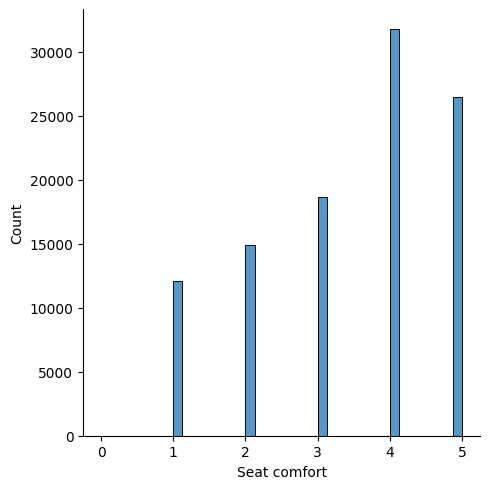

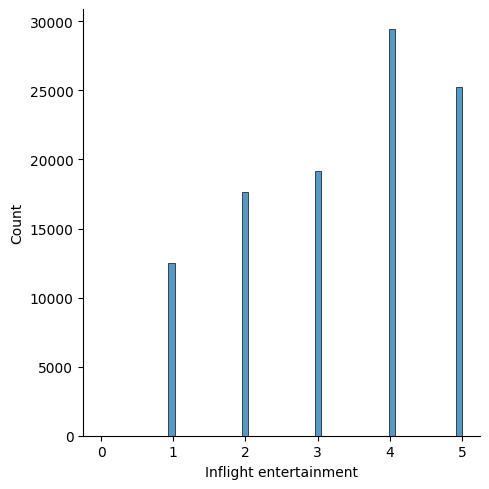

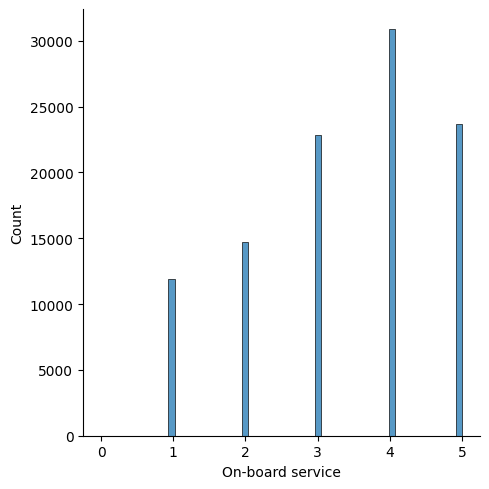

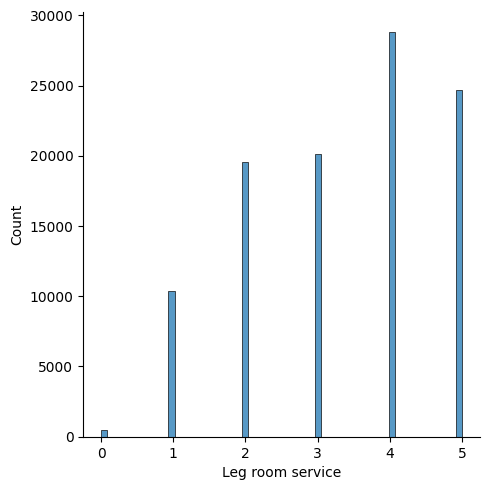

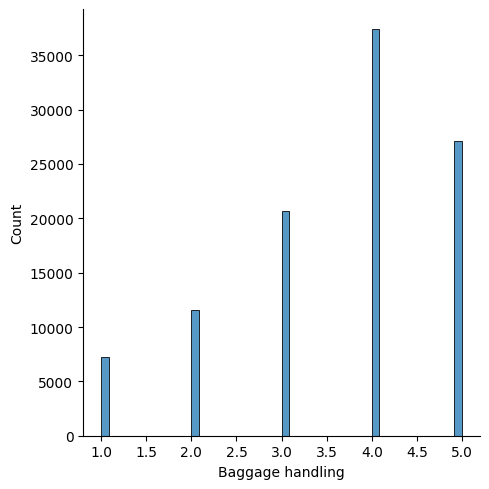

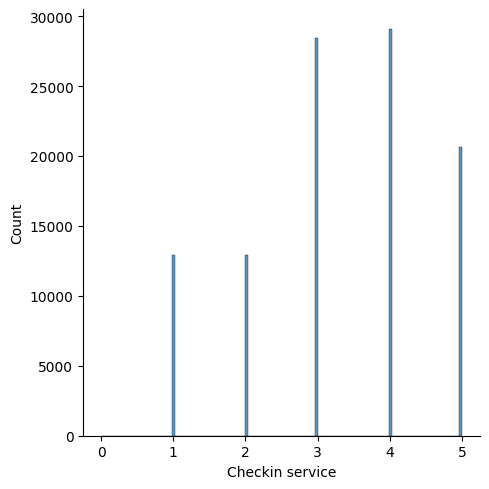

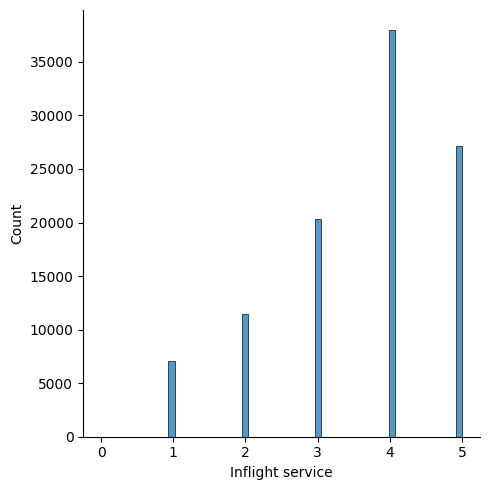

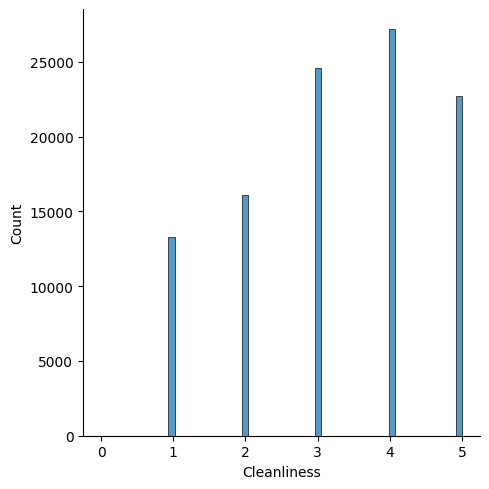

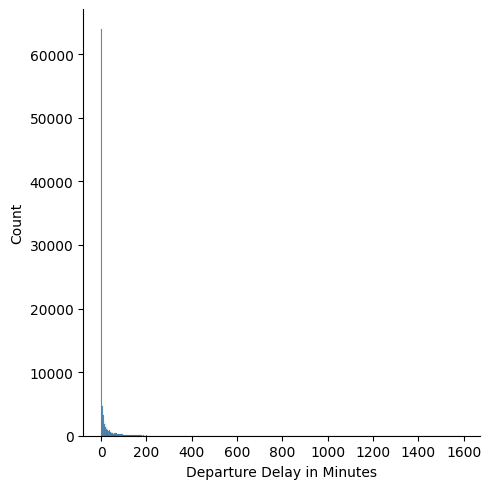

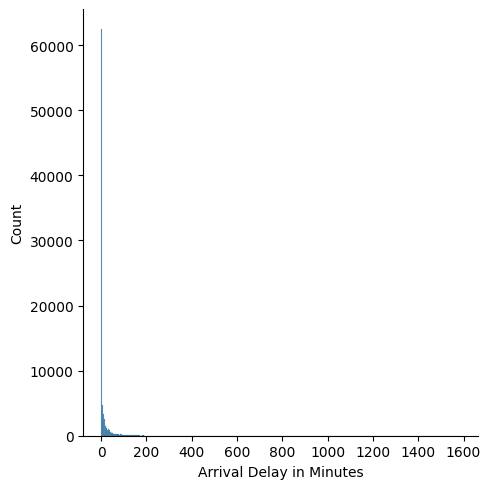

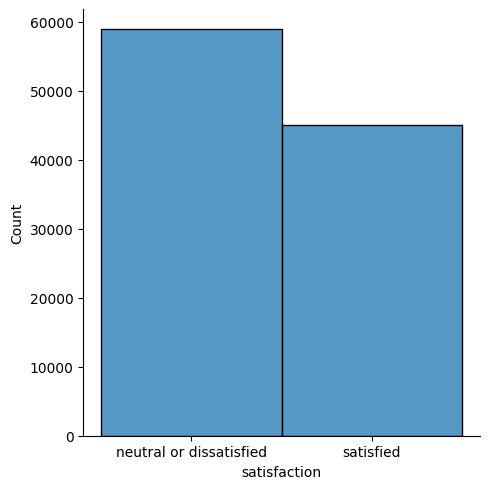

In [12]:
for col in passenger_df.columns:
    sns.displot(x=passenger_df[col],data=passenger_df)

### Handling Missing values

In [13]:
passenger_df["Arrival Delay in Minutes"]=passenger_df["Arrival Delay in Minutes"].fillna(passenger_df["Arrival Delay in Minutes"].median())
# Here we have used median because  there is skewness in the data and median is right represntation of the center tendency of the data

#### Bivariant Analysis

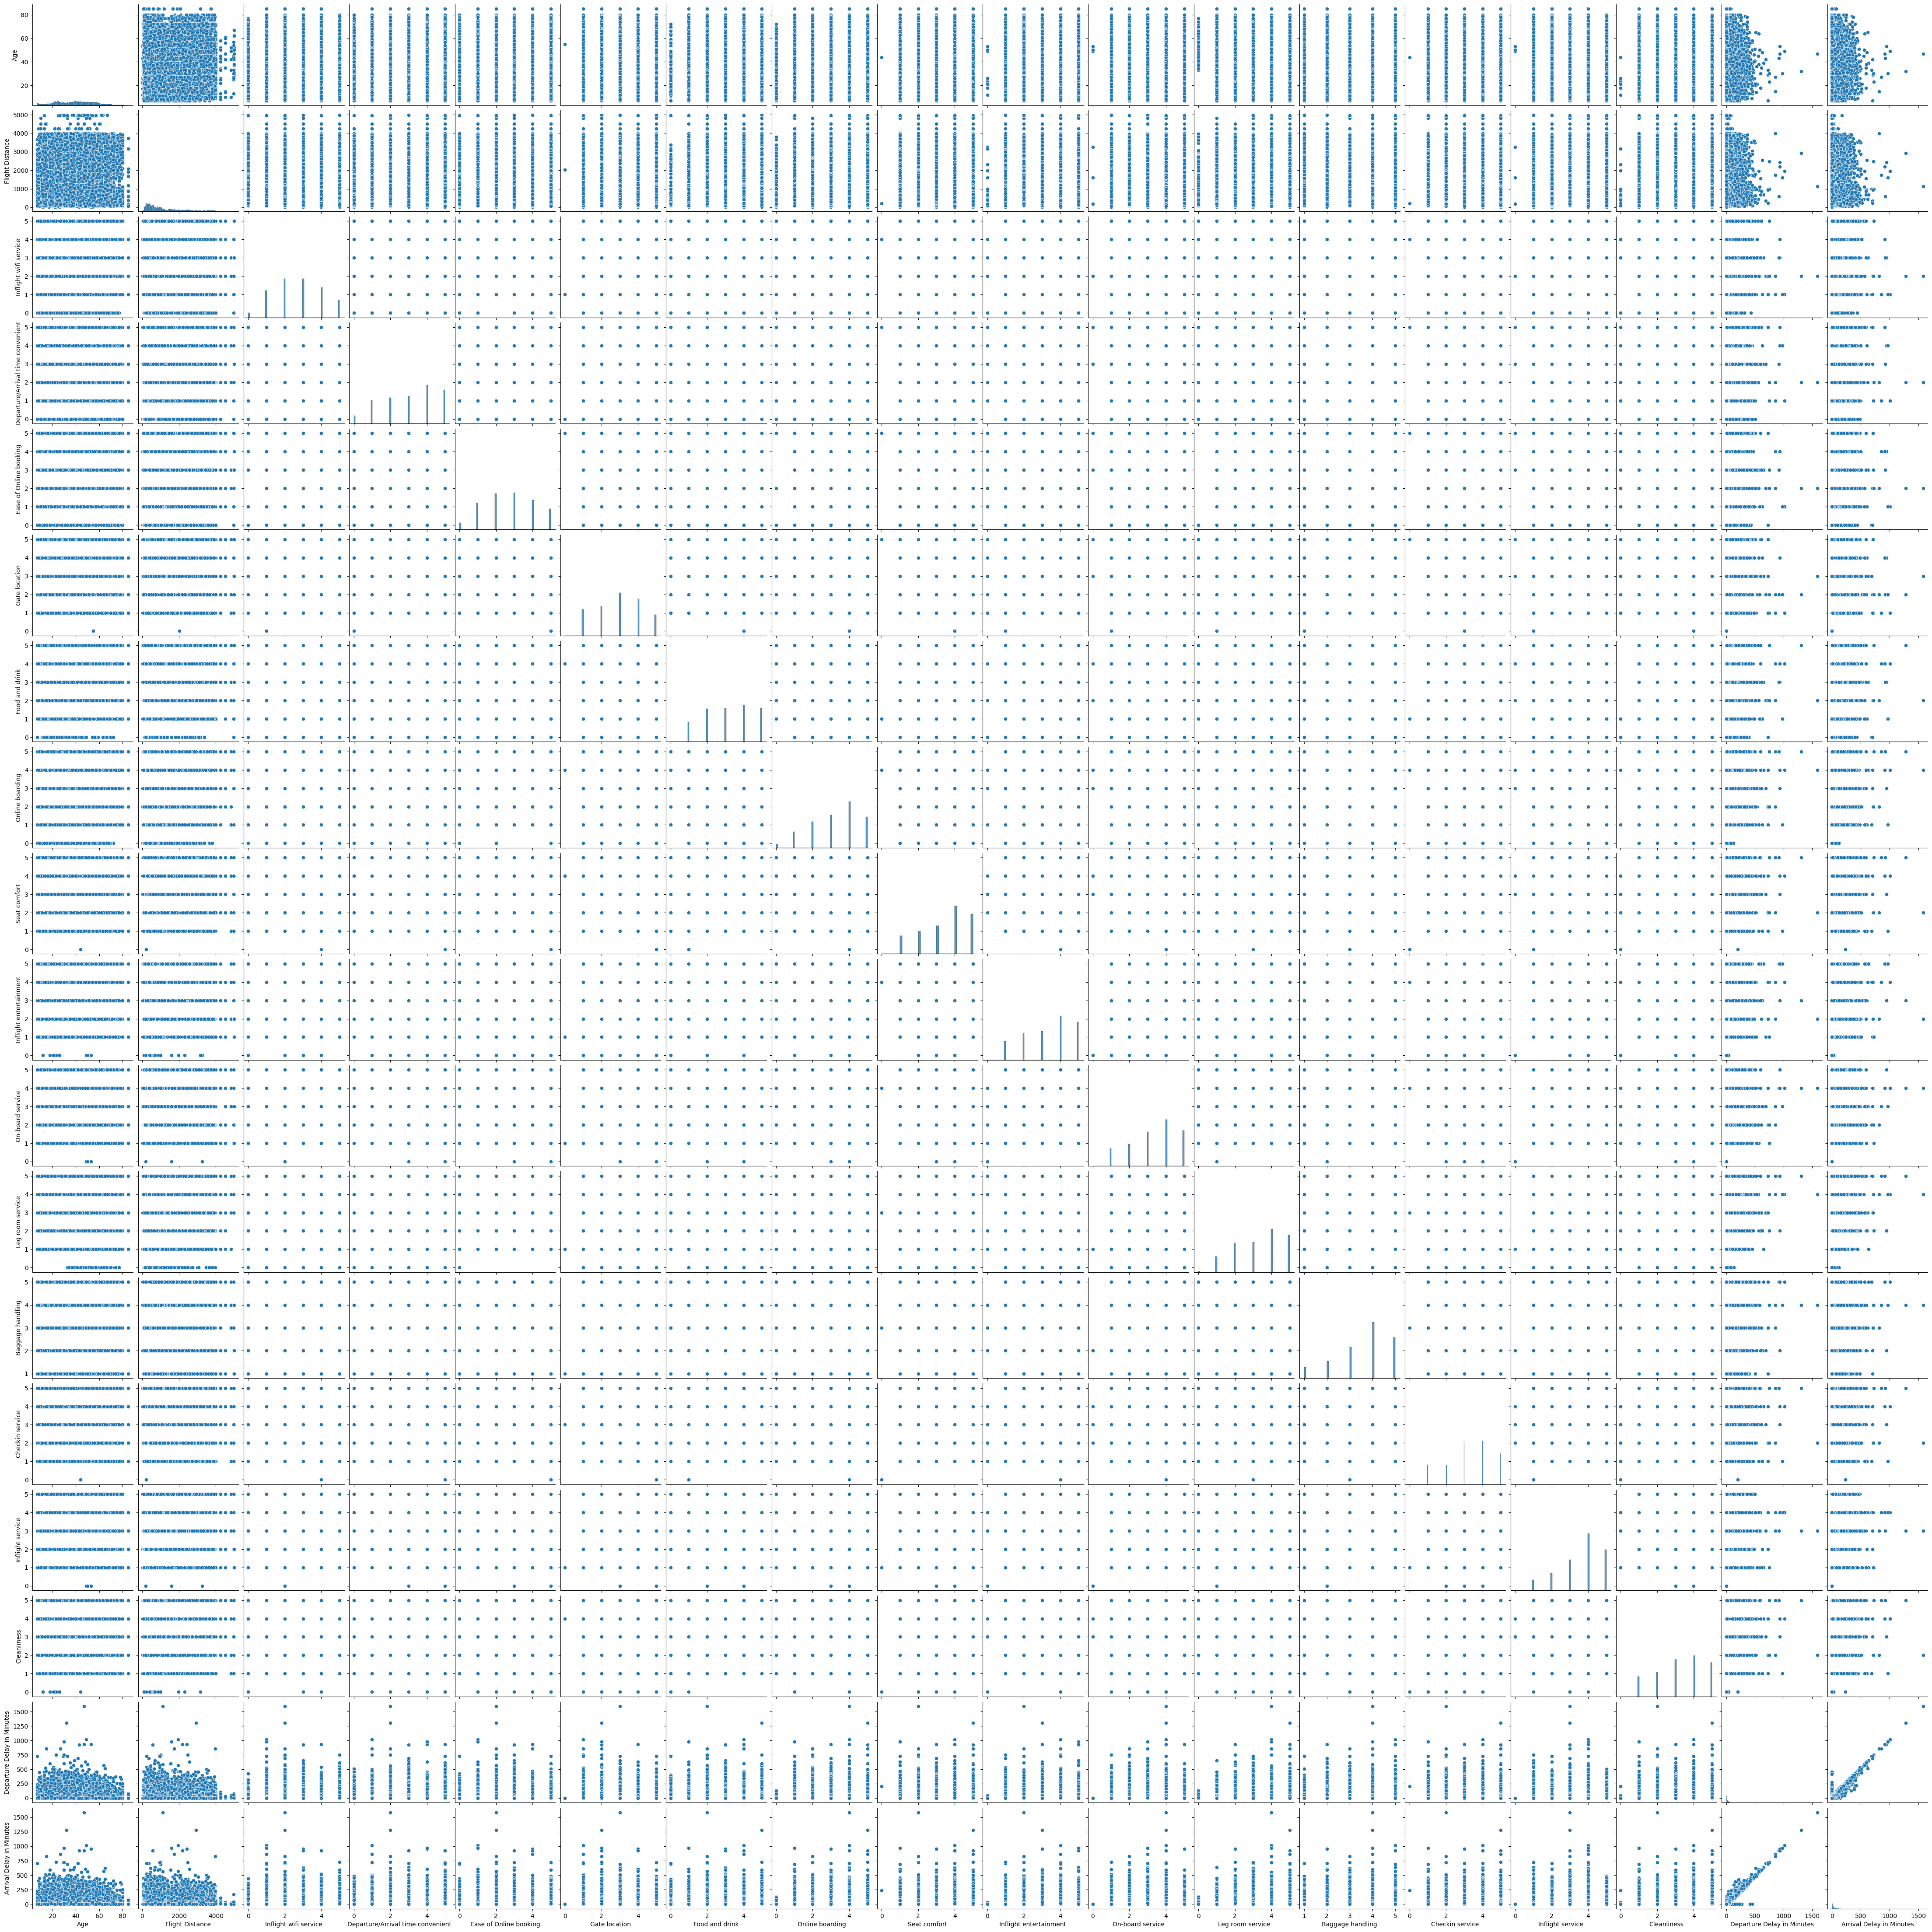

In [14]:
sns.pairplot(passenger_df)

In [15]:
encoder=LabelEncoder()
passenger_df["Gender"]=encoder.fit_transform(passenger_df['Gender'])
passenger_df["Customer Type"]=encoder.fit_transform(passenger_df["Customer Type"])
passenger_df["Type of Travel"]=encoder.fit_transform(passenger_df["Type of Travel"])
passenger_df["Class"]=encoder.fit_transform(passenger_df["Class"])
passenger_df["satisfaction"]=encoder.fit_transform(passenger_df["satisfaction"])

In [16]:
passenger_df

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              0   13               1      2              460   
1            1              1   25               0      0              235   
2            0              0   26               0      0             1142   
3            0              0   25               0      0              562   
4            1              0   61               0      0              214   
...        ...            ...  ...             ...    ...              ...   
103899       0              1   23               0      1              192   
103900       1              0   49               0      0             2347   
103901       1              1   30               0      0             1995   
103902       0              1   22               0      1             1000   
103903       1              0   27               0      0             1723   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                            3              1  ...                       5   
1                            3              3  ...                       1   
2                            2              2  ...                       5   
3                            5              5  ...                       2   
4                            3              3  ...                       3   
...                        ...            ...  ...                     ...   
103899                       2              3  ...                       2   
103900                       4              4  ...                       5   
103901                       1              3  ...                       4   
103902                       1              5  ...                       1   
103903                       3              3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   

### Checking the correlation of columns with each other

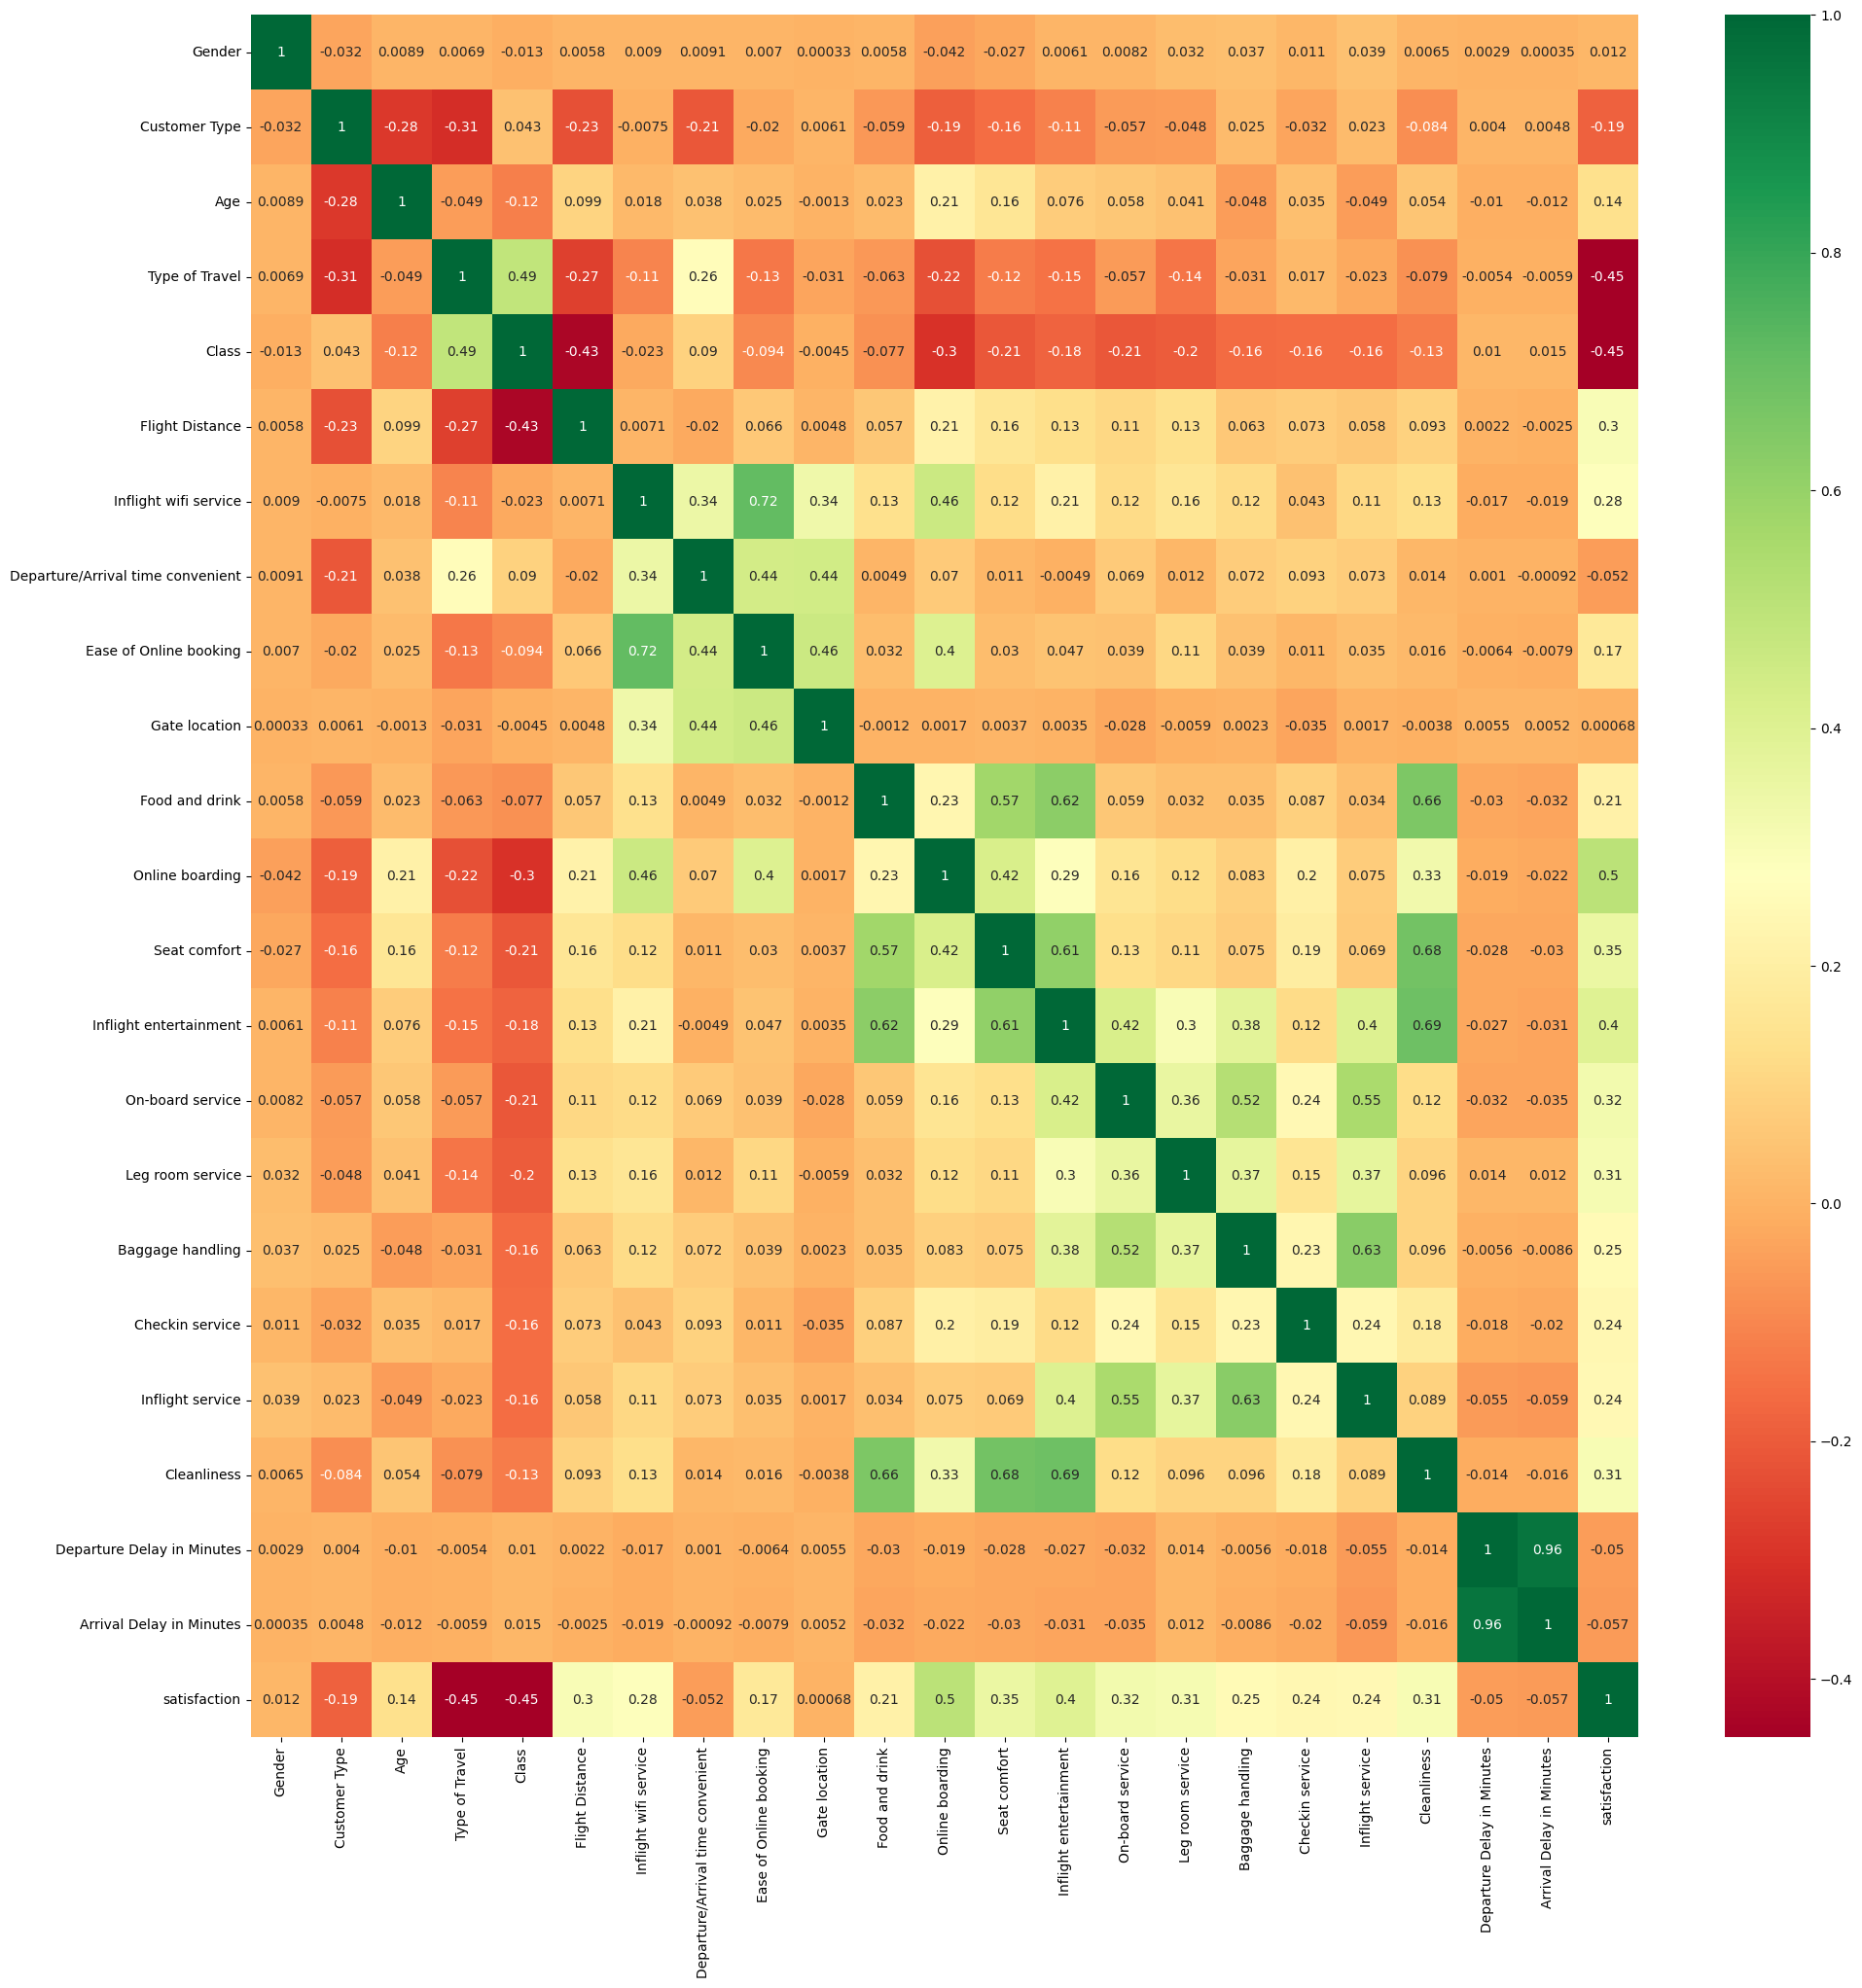

In [17]:
corr=passenger_df.corr()
plt.subplots(figsize=(23,23))
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()

In [18]:
passenger_df.drop(["Departure Delay in Minutes"],inplace=True,axis=1)
# Dropping [Departure Delay in Minutes] column it has very large multicolinearity with [Arrival Delay in Minutes]

### Checking for outliers 

C:\Users\BAPS\AppData\Local\Temp\ipykernel_8404\1894460529.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


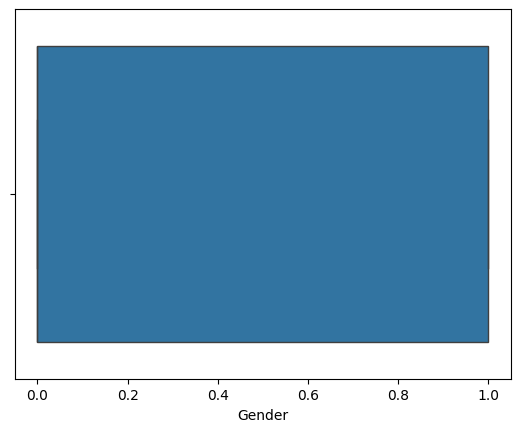

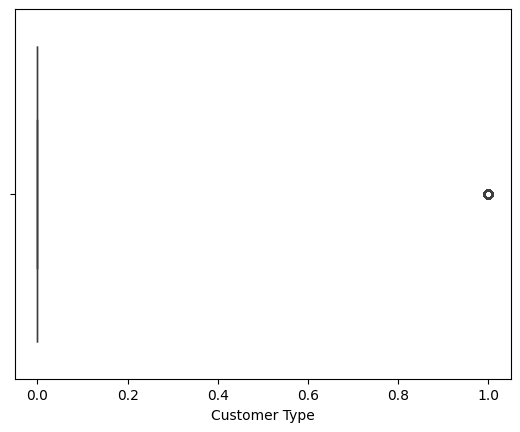

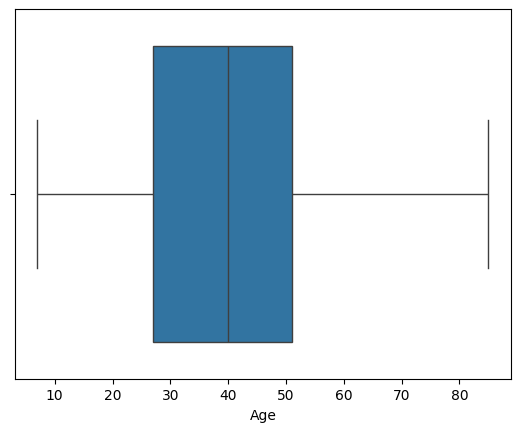

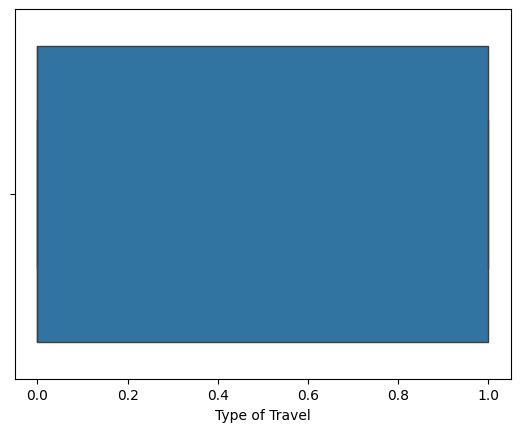

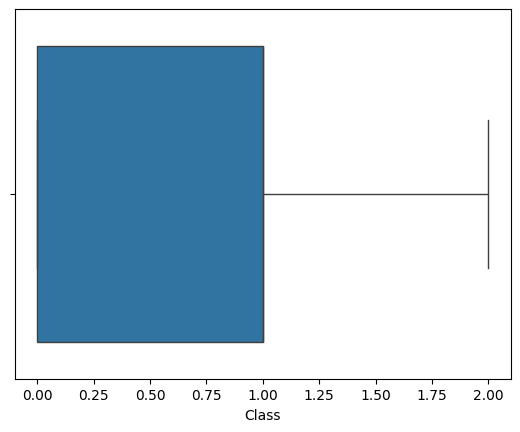

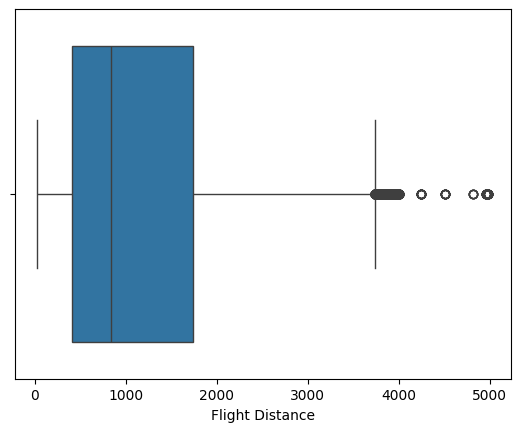

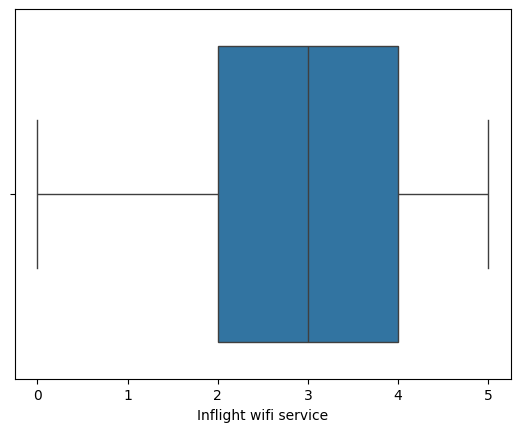

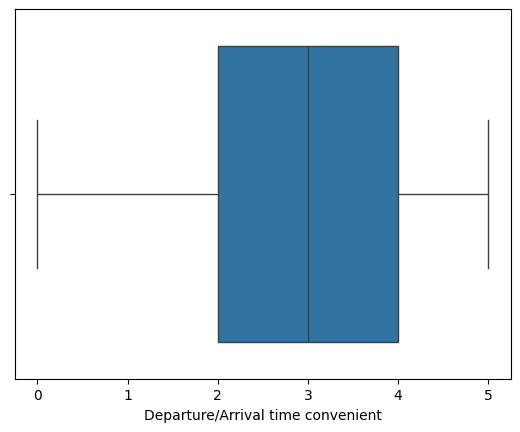

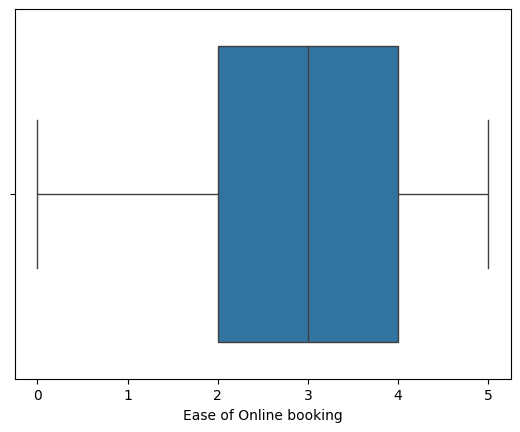

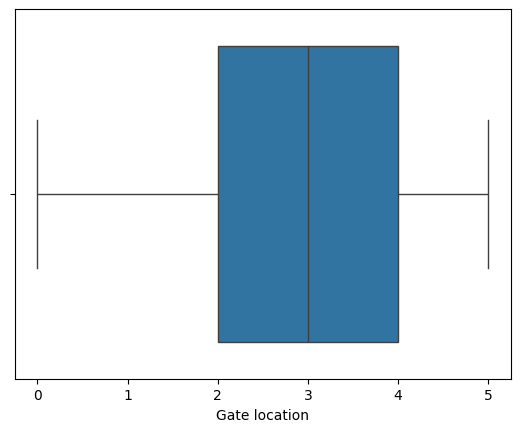

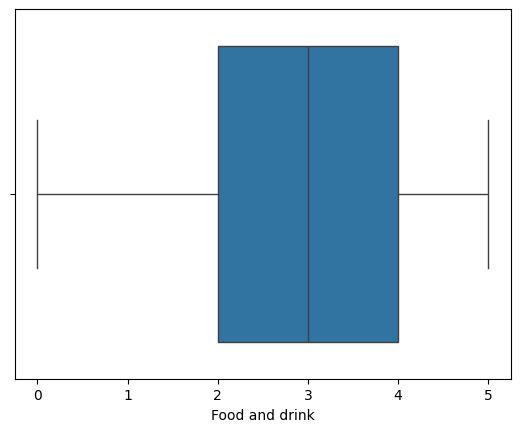

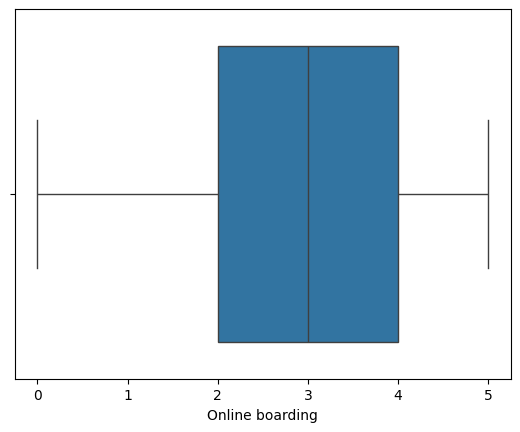

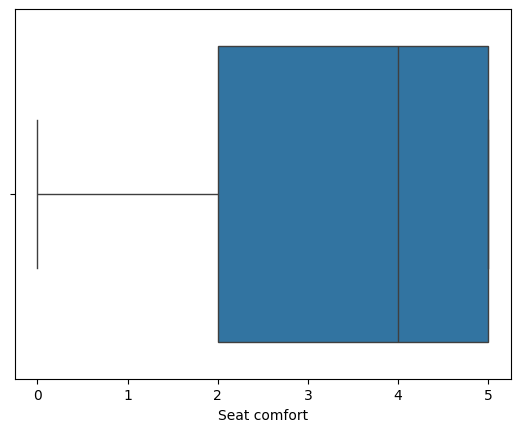

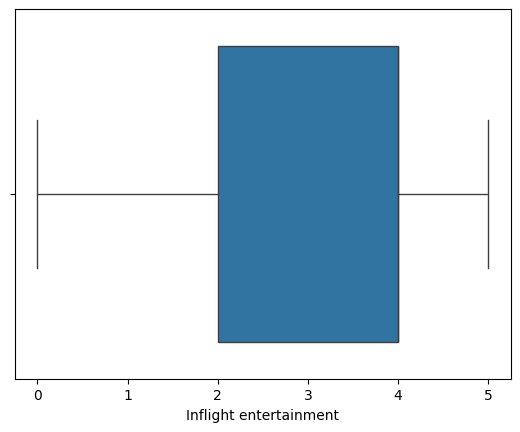

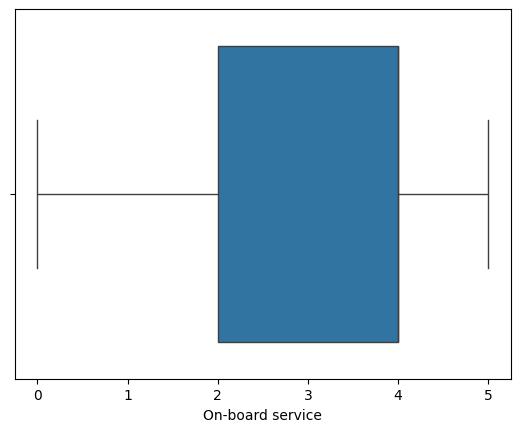

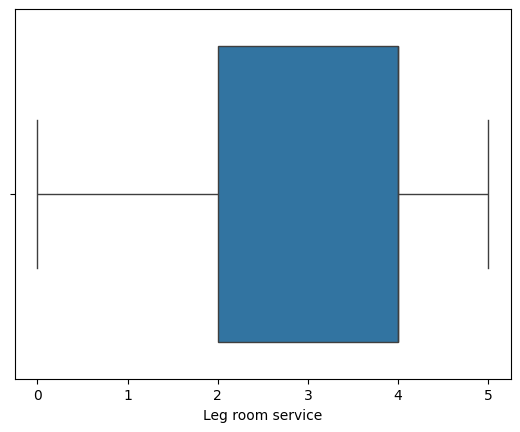

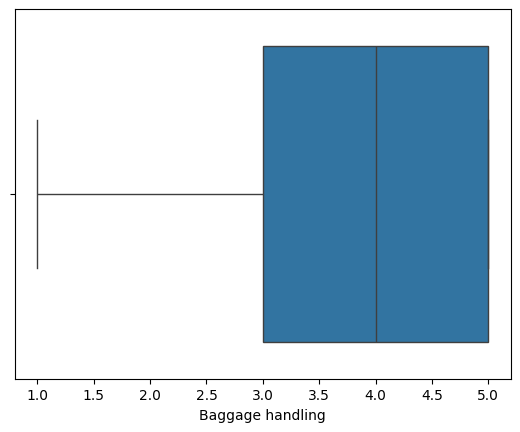

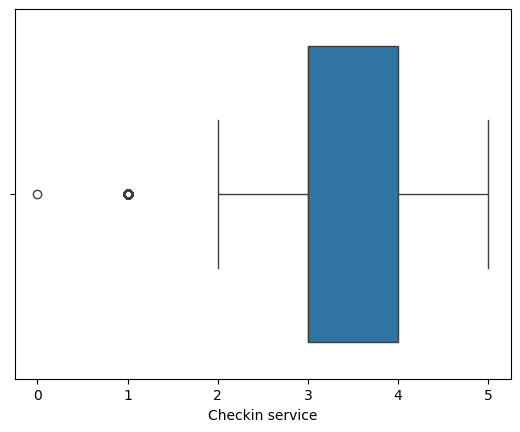

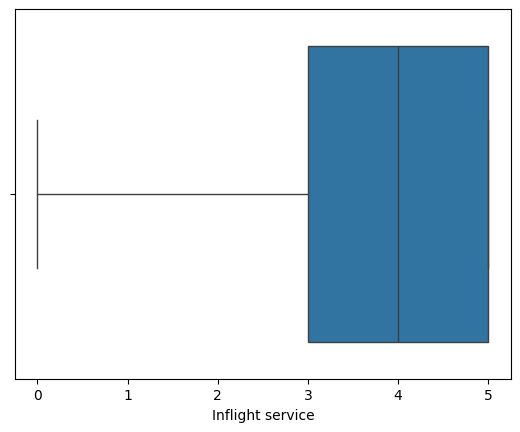

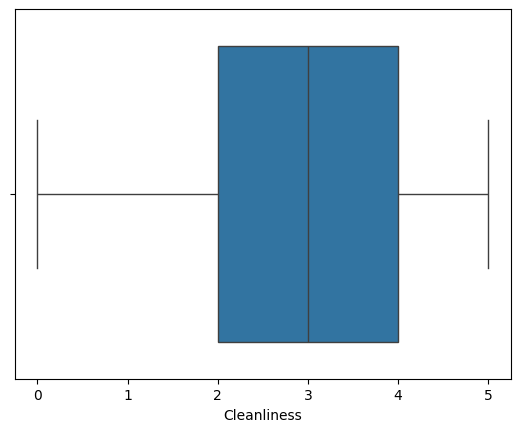

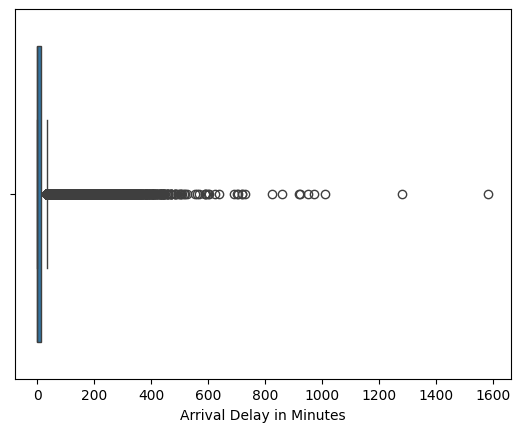

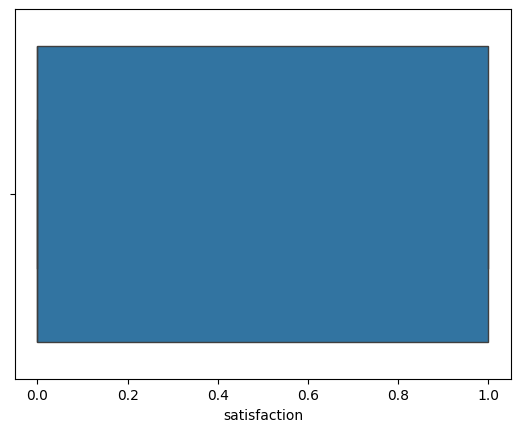

In [19]:
for col in passenger_df.columns:
    plt.figure()
    sns.boxplot(x=passenger_df[col])
# OBSERVATION -> There are outlier present in columns ["Distance","Arrival Delay in Minutes"]

### Removal of Outliers

In [20]:
print('Before outlier removal : ',passenger_df.shape)
z = np.abs(zscore(passenger_df, axis = 1))
threshold = 4.5822
dataset = passenger_df[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

Before outlier removal :  (103904, 22)
After Z-Score approach :  (94977, 22)


In [21]:
dataset.skew()

Gender                               0.031486
Customer Type                        1.550740
Age                                 -0.045642
Type of Travel                       0.772256
Class                                0.474787
Flight Distance                      1.278466
Inflight wifi service                0.041361
Departure/Arrival time convenient   -0.342618
Ease of Online booking              -0.012432
Gate location                       -0.060568
Food and drink                      -0.136820
Online boarding                     -0.441484
Seat comfort                        -0.473905
Inflight entertainment              -0.348656
On-board service                    -0.415210
Leg room service                    -0.345096
Baggage handling                    -0.669566
Checkin service                     -0.363824
Inflight service                    -0.679348
Cleanliness                         -0.288375
Arrival Delay in Minutes             6.345265
satisfaction                      

In [22]:
dataset.kurt()

Gender                               -1.999051
Customer Type                         0.404804
Age                                  -0.717432
Type of Travel                       -1.403650
Class                                -0.654104
Flight Distance                       0.943416
Inflight wifi service                -0.841492
Departure/Arrival time convenient    -1.033597
Ease of Online booking               -0.900586
Gate location                        -1.021542
Food and drink                       -1.154103
Online boarding                      -0.712095
Seat comfort                         -0.939801
Inflight entertainment               -1.080051
On-board service                     -0.902048
Leg room service                     -0.982888
Baggage handling                     -0.412347
Checkin service                      -0.831025
Inflight service                     -0.386658
Cleanliness                          -1.022531
Arrival Delay in Minutes             87.744680
satisfaction 

### Transformation of data

In [23]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
dataset["Arrival Delay in Minutes"]= quantile_transformer.fit_transform(dataset["Arrival Delay in Minutes"].values.reshape(-1, 1)).flatten()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_8404\1507942826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Arrival Delay in Minutes"]= quantile_transformer.fit_transform(dataset["Arrival Delay in Minutes"].values.reshape(-1, 1)).flatten()


### Scaling of Data

In [24]:
from sklearn.preprocessing import StandardScaler
std_scalar=StandardScaler()
scaled_data=std_scalar.fit_transform(dataset)
scaled_df=pd.DataFrame(scaled_data,columns=dataset.columns)
scaled_df.head()

Gender  Customer Type       Age  Type of Travel     Class  \
0  1.015867      -0.490019 -1.847910        1.458078  2.217517   
1  1.015867       2.040735 -1.042342       -0.685834 -1.000899   
2 -0.984381      -0.490019 -0.975211       -0.685834 -1.000899   
3 -0.984381      -0.490019 -1.042342       -0.685834 -1.000899   
4  1.015867      -0.490019  1.374363       -0.685834 -1.000899   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0        -0.668977               0.206112                           0.614846   
1        -0.927757               0.206112                          -0.691791   
2         0.115415              -0.548520                          -0.691791   
3        -0.551663              -0.548520                           1.268165   
4        -0.951910               0.206112                          -0.038473   

   Ease of Online booking  Gate location  ...  Seat comfort  \
0                0.183004      -1.549863  ...      1.185992   
1                0.183004       0.020930  ...     -1.837730   
2               -0.533096      -0.764467  ...      1.185992   
3                1.615203       1.591723  ...     -1.081799   
4                0.183004       0.020930  ...      1.185992   

   Inflight entertainment  On-board service  Leg room service  \
0                1.238233          0.482334         -0.259625   
1               -1.751868         -1.842330          1.257162   
2                1.238233          0.482334         -0.259625   
3               -1.004343         -1.067442          1.257162   
4               -0.256817         -0.292554          0.498768   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0          0.317368         0.550800          1.159914     1.311841   
1         -0.525218        -1.818713          0.313070    -1.730450   
2          0.317368         0.550800          0.313070     1.311841   
3         -0.525218        -1.818713          0.313070    -0.969877   
4          0.317368        -0.239038         -0.533775    -0.209304   

   Arrival Delay in Minutes  satisfaction  
0                  1.061614     -0.851214  
1                  0.936645     -0.851214  
2                 -0.895721      1.174792  
3                  0.973432     -0.851214  
4                 -0.895721      1.174792  

[5 rows x 22 columns]

## K-Means 

In [25]:
from sklearn.cluster import KMeans

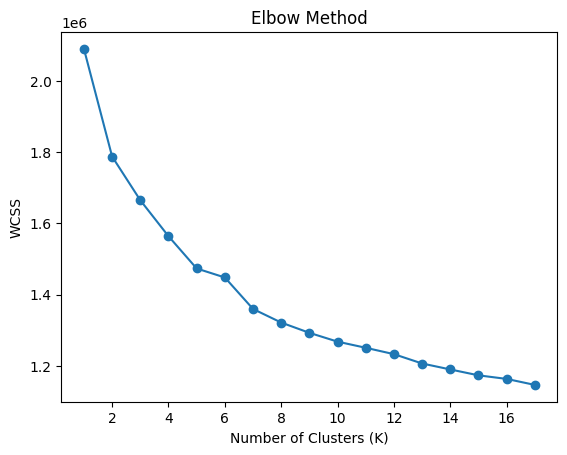

In [26]:
wcss = []
for k in range(1,18):   # Try 1–10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,18), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [27]:
from kneed import KneeLocator
knee = KneeLocator(range(1,18), wcss, curve="convex", direction="decreasing")
knee.elbow

np.int64(7)

In [28]:
pca = PCA()
df_pca = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(data=df_pca)

In [29]:
len(pca.explained_variance_ratio_)

22

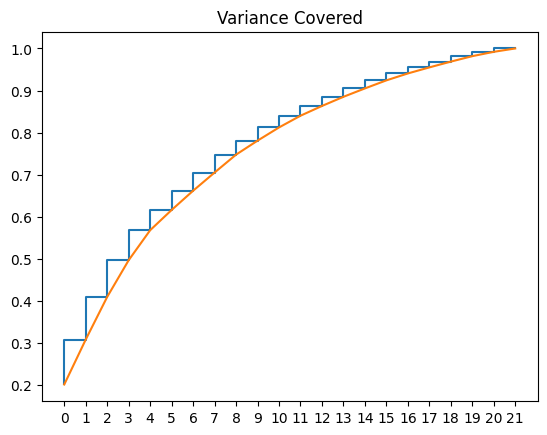

In [30]:
plt.step(list(range(0,22)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(0,22))
plt.title("Variance Covered")
plt.show()

In [31]:
df_pca = df_pca.drop(columns=[17,18,19,20,21])

In [32]:
knee = KneeLocator(range(1,18), wcss, curve="convex", direction="decreasing")
knee.elbow

np.int64(7)

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
model = KMeans(n_clusters=7)
model.fit(df_pca)
labels = model.labels_
silhouette_score(df_pca, labels)

0.12687592113325669

In [35]:
df_pca[17]=labels

In [36]:
df_pca

0         1         2         3         4         5         6   \
0      0.737582 -0.806711 -0.622619  3.898944  0.478720  0.450935  0.105708   
1     -3.083632  0.689551  1.907533 -2.117872  2.116359  0.962462  0.828820   
2      2.673768 -1.797001 -1.153417 -0.122160  0.540817 -1.214272 -0.596379   
3     -1.696028  2.221609  1.143659 -0.753355  0.675977  1.703171 -0.981545   
4      1.528708  0.332021 -0.849403 -1.074019 -0.460693 -0.780211  1.510584   
...         ...       ...       ...       ...       ...       ...       ...   
94972 -3.151394 -0.756561  0.696700 -0.562176  2.384451 -1.100705 -0.296903   
94973  3.764867  0.730929  1.536377 -0.520108 -0.873511  0.162757  0.945158   
94974  0.071759 -2.954820  0.082498 -0.087548  1.555003  2.001407 -0.078067   
94975 -3.455141 -0.802888  2.366369 -1.259890  1.366196 -0.690694 -0.656166   
94976 -3.482856  0.163875  1.174045 -1.885669 -0.572758  0.311640  0.987043   

             7         8         9         10        11        12        13  \
0      1.597395 -1.390121 -0.964399 -0.749454  0.711348  0.184195  0.380831   
1      0.115144 -1.250172 -0.316575  0.814615 -0.007666 -1.500274 -1.149531   
2      0.031739  0.447324 -0.925074 -0.805198 -0.723522 -0.171614 -0.062836   
3     -1.509648  0.120712 -1.142744  0.900401 -1.099557 -1.456472 -0.543072   
4      0.011652 -0.285294  0.827757  0.530590 -1.081824 -0.898733 -0.583837   
...         ...       ...       ...       ...       ...       ...       ...   
94972 -0.798444  0.506597  0.545830 -1.203831 -0.083814  0.450483 -0.224916   
94973  0.194187  0.964806 -0.102662  0.301442  0.356718  0.452375 -0.080987   
94974  1.376945  1.936646  0.707785 -0.545013  0.991142  0.332756 -0.578651   
94975 -0.069459  2.041655 -0.283483  2.195253  0.057702  1.458977  1.302909   
94976  0.808687  2.049814 -0.829041 -1.114269 -0.145452 -0.017491 -1.153608   

             14        15        16  17  
0      0.286575 -0.456760  0.647386   4  
1     -0.324974 -0.062182  0.812402   1  
2     -0.045101  0.120258  0.003271   0  
3      0.033722  0.205217  0.785328   2  
4     -0.024203 -0.163779 -0.554496   6  
...         ...       ...       ...  ..  
94972 -0.210267 -0.120652 -0.636365   1  
94973 -0.567654 -0.658929  0.038132   6  
94974 -0.388990  0.212869  0.657108   3  
94975 -1.389788  0.361856  1.429228   1  
94976  0.889720  0.568829 -0.290777   2  

[94977 rows x 18 columns]

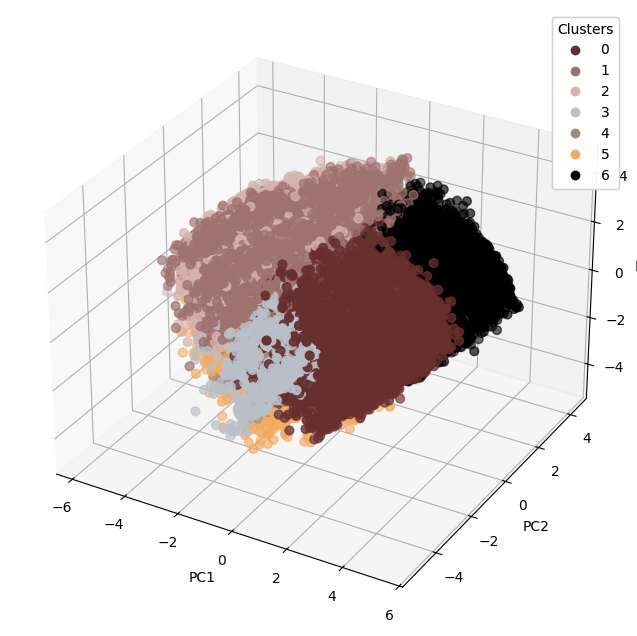

In [37]:
# PCA to reduce 17 features → 3D
pca = PCA(n_components=17)
data = pca.fit_transform(df_pca.iloc[:, :17])

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111,projection="3d")

scatter = ax.scatter(
    data[:, 0], data[:, 1], data[:, 2],
     c=df_pca[17], s=40,
     cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60","black"])
)
# Add legend for clusters
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
# ax.view_init(elev=200, azim=120)

plt.show()


## OPTICS

In [38]:
from sklearn.cluster import OPTICS

In [58]:
clustering = OPTICS(min_samples=20, max_eps=0.00002)
clustering.fit(df_pca)

optics_labels = clustering.labels_

c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:662: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(


In [59]:
print(len(optics_labels))

94977


In [60]:
df_pca

0         1         2         3         4         5         6   \
0      0.737582 -0.806711 -0.622619  3.898944  0.478720  0.450935  0.105708   
1     -3.083632  0.689551  1.907533 -2.117872  2.116359  0.962462  0.828820   
2      2.673768 -1.797001 -1.153417 -0.122160  0.540817 -1.214272 -0.596379   
3     -1.696028  2.221609  1.143659 -0.753355  0.675977  1.703171 -0.981545   
4      1.528708  0.332021 -0.849403 -1.074019 -0.460693 -0.780211  1.510584   
...         ...       ...       ...       ...       ...       ...       ...   
94972 -3.151394 -0.756561  0.696700 -0.562176  2.384451 -1.100705 -0.296903   
94973  3.764867  0.730929  1.536377 -0.520108 -0.873511  0.162757  0.945158   
94974  0.071759 -2.954820  0.082498 -0.087548  1.555003  2.001407 -0.078067   
94975 -3.455141 -0.802888  2.366369 -1.259890  1.366196 -0.690694 -0.656166   
94976 -3.482856  0.163875  1.174045 -1.885669 -0.572758  0.311640  0.987043   

             7         8         9         10        11        12        13  \
0      1.597395 -1.390121 -0.964399 -0.749454  0.711348  0.184195  0.380831   
1      0.115144 -1.250172 -0.316575  0.814615 -0.007666 -1.500274 -1.149531   
2      0.031739  0.447324 -0.925074 -0.805198 -0.723522 -0.171614 -0.062836   
3     -1.509648  0.120712 -1.142744  0.900401 -1.099557 -1.456472 -0.543072   
4      0.011652 -0.285294  0.827757  0.530590 -1.081824 -0.898733 -0.583837   
...         ...       ...       ...       ...       ...       ...       ...   
94972 -0.798444  0.506597  0.545830 -1.203831 -0.083814  0.450483 -0.224916   
94973  0.194187  0.964806 -0.102662  0.301442  0.356718  0.452375 -0.080987   
94974  1.376945  1.936646  0.707785 -0.545013  0.991142  0.332756 -0.578651   
94975 -0.069459  2.041655 -0.283483  2.195253  0.057702  1.458977  1.302909   
94976  0.808687  2.049814 -0.829041 -1.114269 -0.145452 -0.017491 -1.153608   

             14        15        16  17  
0      0.286575 -0.456760  0.647386   4  
1     -0.324974 -0.062182  0.812402   1  
2     -0.045101  0.120258  0.003271   0  
3      0.033722  0.205217  0.785328   2  
4     -0.024203 -0.163779 -0.554496   6  
...         ...       ...       ...  ..  
94972 -0.210267 -0.120652 -0.636365   1  
94973 -0.567654 -0.658929  0.038132   6  
94974 -0.388990  0.212869  0.657108   3  
94975 -1.389788  0.361856  1.429228   1  
94976  0.889720  0.568829 -0.290777   2  

[94977 rows x 18 columns]

In [ ]:
import numpy as np

np.unique(optics_labels, return_counts=True)

(array([-1]), array([94977]))

In [63]:
import numpy as np

unique_labels, counts = np.unique(optics_labels, return_counts=True)
print("Clusters found:", dict(zip(unique_labels, counts)))


Clusters found: {np.int64(-1): np.int64(94977)}


In [ ]:
from sklearn.metrics import silhouette_score

if len(set(optics_labels)) > 1:
    score = silhouette_score(df_pca, optics_labels)
    print("Silhouette Score:", score)
else:
    print("Cannot calculate silhouette score: only one cluster was found")

❌ Cannot calculate silhouette score: only one cluster was found


In [65]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
import numpy as np

# Parameter grid to try
param_grid = [
    {"min_samples": 3, "xi": 0.05, "min_cluster_size": 0.05},
    {"min_samples": 5, "xi": 0.02, "min_cluster_size": 0.1},
    {"min_samples": 10, "xi": 0.1, "min_cluster_size": 0.05},
    {"min_samples": 5, "xi": 0.01, "min_cluster_size": 0.2},
    {"min_samples": 80, "xi": 0.05, "min_cluster_size": 0.1},  # extra trial
]

# Run OPTICS with each parameter set
for i, params in enumerate(param_grid, start=1):
    optics = OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"]
    )
    
    labels = optics.fit_predict(df_pca)
    unique, counts = np.unique(labels, return_counts=True)
    
    print(f"\n--- Trial {i} with params {params} ---")
    print("Clusters found:", dict(zip(unique, counts)))
    
    if len(set(labels)) > 1:
        score = silhouette_score(df_pca, labels)
        print("Silhouette Score:", round(score, 4))
    else:
        print(" Only one cluster found, skipping silhouette score")


--- Trial 1 with params {'min_samples': 3, 'xi': 0.05, 'min_cluster_size': 0.05} ---
Clusters found: {np.int64(0): np.int64(94977)}
❌ Only one cluster found, skipping silhouette score

--- Trial 2 with params {'min_samples': 5, 'xi': 0.02, 'min_cluster_size': 0.1} ---
Clusters found: {np.int64(0): np.int64(94977)}
❌ Only one cluster found, skipping silhouette score

--- Trial 3 with params {'min_samples': 10, 'xi': 0.1, 'min_cluster_size': 0.05} ---
Clusters found: {np.int64(0): np.int64(94977)}
❌ Only one cluster found, skipping silhouette score

--- Trial 4 with params {'min_samples': 5, 'xi': 0.01, 'min_cluster_size': 0.2} ---
Clusters found: {np.int64(0): np.int64(94977)}
❌ Only one cluster found, skipping silhouette score

--- Trial 5 with params {'min_samples': 8, 'xi': 0.05, 'min_cluster_size': 0.1} ---
Clusters found: {np.int64(0): np.int64(94977)}
❌ Only one cluster found, skipping silhouette score


## K Medoid

In [58]:
from pyclustering.cluster.kmedoids import kmedoids

In [ ]:
n_clusters=5
initial_medoids = list(range(n_clusters))  # pick first few points as medoids

kmedoids_instance = kmedoids(data,initial_medoids)
kmedoids_instance.process()

In [ ]:
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

TypeError: kmedoids.__init__() missing 2 required positional arguments: 'data' and 'initial_index_medoids'


--- Partitioning ---


NameError: name 'initial_medoids' is not defined